# 1. Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

if os.getcwd() == '/content':
    base_path = '/content/drive/MyDrive/Colab Notebooks/DScourse/week9/spacetitanic/'
else:
    base_path = os.getcwd() + '/spacetitanic/'

print(base_path)

/content/drive/MyDrive/Colab Notebooks/DScourse/week9/spacetitanic/


In [2]:
train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
print(train.shape, test.shape)

(8693, 14) (4277, 13)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.info(memory_usage='deep') #dtype이 object인 column은 실제 메모리 사용량과 보여지는게 다르다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.7 MB


+표시가 있는 것은 object가 있는 경우, 실제 string 길이가 얼마인지 모르기 때문에 최소값 뒤에 적혀있는 것이다.

즉, +a 개념이라고 보면 됨.


# 2. Data Preprocessing
## 2-1. 결측치 처리

In [5]:
# 1. 결측치 확인
train[train.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [6]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [7]:
# 2. dtype이 object인 column
cat_feauters = train.columns[train.dtypes == 'object']


In [8]:
# # 3. target values distribution
# _, ax = plt.subplots(5, 3, figsize=(20, 12))
# for i in range(5):
#     for j in range(3):
#         try:
#             sns.histplot(data=train, x=train.columns[3*i+j], ax=ax[i][j])
#         except:
#             continue
# plt.show()


In [9]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [10]:
train.groupby(by=['Destination']).size()

Destination
55 Cancri e      1800
PSO J318.5-22     796
TRAPPIST-1e      5915
dtype: int64

In [11]:
train.groupby(by=['HomePlanet']).size()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
dtype: int64

In [12]:
train.groupby(by=['CryoSleep']).size()

CryoSleep
False    5439
True     3037
dtype: int64

In [13]:
train['Cabin'].unique()
# train.groupby(by=['Cabin']).size()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [14]:
train['VIP']

0       False
1       False
2        True
3       False
4       False
        ...  
8688     True
8689    False
8690    False
8691    False
8692    False
Name: VIP, Length: 8693, dtype: object

True     4378
False    4315
Name: Transported, dtype: int64

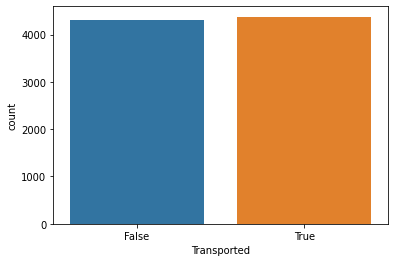

In [15]:
sns.countplot(data=train, x='Transported')
train.Transported.value_counts()

In [16]:
# 1. 결측치 처리
train = train.dropna()

# 2. dtype이 object인 column 처리
train = train.drop(cat_feauters, axis=1)

# 3. Target value encoding
target_map = {True: 1, False: 0}
train.Transported = train.Transported.map(target_map)

In [17]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,39.0,0.0,0.0,0.0,0.0,0.0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,0


# 3. Data Preparation

- train, validation, test data를 만듭니다.

In [18]:
from sklearn.model_selection import train_test_split

X = train.drop(columns='Transported')
y = train.Transported

# 트테트테
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Random Shuffle and Split
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(5284, 6) (1322, 6) (5284,) (1322,)


In [19]:
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
7832,25.0,0.0,1673.0,0.0,642.0,612.0
5842,36.0,0.0,2624.0,1657.0,2799.0,1.0
3928,34.0,0.0,0.0,0.0,0.0,0.0
4091,37.0,0.0,0.0,0.0,0.0,0.0
7679,22.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4984,31.0,0.0,0.0,0.0,0.0,0.0
6864,22.0,28.0,194.0,2.0,0.0,370.0
6919,25.0,0.0,115.0,0.0,1823.0,4041.0
7137,40.0,0.0,21.0,0.0,1503.0,1392.0


# 4. Training

In [20]:
# 1. SVM
from sklearn.svm import SVC
# 2. Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC
# 3. XGBoost
import xgboost as xgb
# 4. LightGBM
import lightgbm as lgb

clf_svm = SVC(C=0.1) # C = [0.1, 1000], kernel : 'linear'
clf_rf = RFC(n_estimators=30,
             max_depth=4, # rule-of-thumb: sqrt(# of features)
             max_features=0.8, # 0.7~0.9를 많이 씀
             random_state=42,
             n_jobs=2)

clf_svm.fit(X_train, y_train)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=0.8, n_estimators=30, n_jobs=2,
                       random_state=42)

# 5. Evaluation
- Evaluation Metric을 정하고, metric을 기준으로 train, validation 성능을 측정합니다.

In [21]:
from sklearn.metrics import accuracy_score

pred_train = clf_svm.predict(X_train)
pred_val = clf_svm.predict(X_val)

pred2_train = clf_rf.predict(X_train)
pred2_val = clf_rf.predict(X_val)

print('--------------- SVM ---------------')
print("Train Accuracy: %.4f" % accuracy_score(y_train, pred_train))
print("Validation Accuracy: %.4f" % accuracy_score(y_val, pred_val))
print()
print('---------- Random Forest ----------')
print("Train Accuracy: %.4f" % accuracy_score(y_train, pred2_train))
print("Validation Accuracy: %.4f" % accuracy_score(y_val, pred2_val))

--------------- SVM ---------------
Train Accuracy: 0.7790
Validation Accuracy: 0.7753

---------- Random Forest ----------
Train Accuracy: 0.8017
Validation Accuracy: 0.7973


In [22]:
print(os.cpu_count())

2


# 6. Prediction


In [23]:
test = pd.read_csv(base_path + 'test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [24]:
test[test.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
11,0040_01,Europa,False,D/2/P,TRAPPIST-1e,45.0,False,932.0,74.0,NaN,7.0,1010.0,Antino Pinoffent
15,0046_02,Earth,False,F/11/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,903.0,NaN,Glene Powery
18,0047_02,Europa,False,NaN,TRAPPIST-1e,29.0,False,0.0,7708.0,243.0,569.0,343.0,Muons Prucerod
19,0047_03,Europa,False,B/0/S,TRAPPIST-1e,40.0,False,26.0,1925.0,8.0,3144.0,63.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,False,0.0,0.0,0.0,0.0,0.0,Caseye Emenez
4267,9260_01,Earth,True,G/1503/P,55 Cancri e,3.0,NaN,0.0,0.0,0.0,0.0,0.0,Luisy Portananney
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore


In [25]:
# 1. dtype이 object인 column 처리
X_test = test.drop(cat_feauters, axis=1)

# 2. 결측치 처리
X_test = X_test.fillna(train.median())
X_test

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,27.0,0.0,0.0,0.0,0.0,0.0
4275,27.0,0.0,2680.0,0.0,0.0,523.0


In [26]:
clf_svm.predict(X_train)
clf_rf

array([1, 0, 1, ..., 1, 1, 1])

In [27]:
pd.concat([X_test, pd.Series(clf_rf.predict(X_test), index=X_test.index, name='Transported')], axis=1)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,27.0,0.0,0.0,0.0,0.0,0.0,1
1,19.0,0.0,9.0,0.0,2823.0,0.0,0
2,31.0,0.0,0.0,0.0,0.0,0.0,1
3,38.0,0.0,6652.0,0.0,181.0,585.0,1
4,20.0,10.0,0.0,635.0,0.0,0.0,1
...,...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0,1
4273,42.0,0.0,847.0,17.0,10.0,144.0,0
4274,27.0,0.0,0.0,0.0,0.0,0.0,1
4275,27.0,0.0,2680.0,0.0,0.0,523.0,1


# 7. Make Submission file

In [28]:
submission = pd.read_csv(base_path + 'sample_submission.csv')
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


In [29]:
inverse_map = {0: False, 1: True}
output = pd.Series(output, name='Transported').map(inverse_map)

In [30]:
submission = pd.concat([test.PassengerId, output], axis=1)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [31]:
submission.to_csv(base_path + 'submission.csv', index=False)